# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the dataset

In [2]:
from sklearn.datasets import make_classification

In [18]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=1011)

In [19]:
X[:5]

array([[-0.37102348, -1.0847271 ],
       [-1.59105996, -0.82597364],
       [-2.04595538,  2.25680982],
       [-1.61620958, -0.84630206],
       [-0.82636441, -1.2330867 ]])

In [20]:
y[:5]

array([1, 1, 0, 1, 1])

# Visualize the data

In [21]:
pd.DataFrame(X)[:5]

,0,1
0,-0.371023,-1.084727
1,-1.591060,-0.825974
2,-2.045955,2.256810
3,-1.616210,-0.846302
4,-0.826364,-1.233087


<Axes: xlabel='0', ylabel='1'>

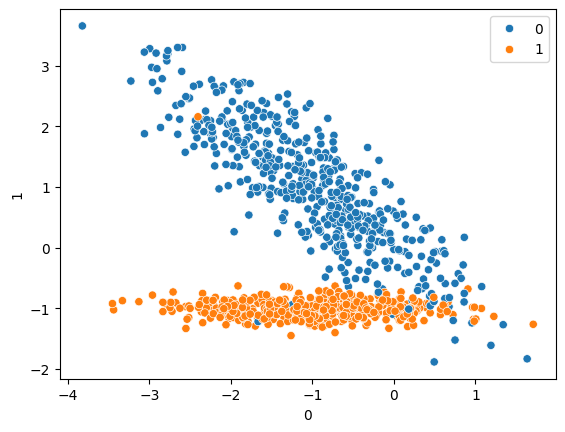

In [22]:
# Assuming X is your input data and y is your labels
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1011)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 2), (250, 2), (750,), (250,))

 # Create the model

In [26]:
from sklearn.svm import SVC

In [27]:
svc = SVC(kernel='linear')

In [28]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

# Predict using the model

In [29]:
y_pred = svc.predict(X_test)
y_pred[:5]

array([0, 1, 0, 1, 0])

# Check the performance of the model

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       121
           1       0.96      0.98      0.97       129

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [32]:
print(confusion_matrix(y_test, y_pred))

[[116   5]
 [  2 127]]


### We get this amazing accuracy because our data is clearly separable by a line.. but if we have overlapping data then we need to change the KERNEL, we can use kernels like rbf, sigmoid, polynomial etc..

************

# Hyper Parameter tuning

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']}

In [35]:
model = SVC()

In [36]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, refit=True)

In [38]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0

[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [39]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [40]:
grid.best_estimator_

SVC(C=1000, gamma=0.1)

In [41]:
y_pred_gird = grid.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred_gird))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       121
           1       0.96      0.98      0.97       129

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [43]:
print(confusion_matrix(y_test, y_pred_gird))

[[116   5]
 [  2 127]]
